In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import json
import matplotlib.pyplot as plt
import pydot
import graphviz
import io
from ann_visualizer.visualize import ann_viz

In [88]:

# Load user input data
with open('user.json', 'r') as f:
    user_data = json.load(f)

In [95]:
# Create label encoders
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()


data = user_data["data"]
result = user_data["result"]
dataframe = pd.DataFrame(data, columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
resultframe = pd.DataFrame(result, columns=["favorite"])

# Generate numerical labels
dataframe["Name"] = le1.fit_transform(dataframe["Name"])
dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])
dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])
dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
dataframe["color"] = le6.fit_transform(dataframe["color"])
dataframe["first_letter"] = le7.fit_transform(dataframe["first_letter"])
resultframe["favorite"] = le8.fit_transform(resultframe["favorite"])

print(resultframe)

# Split data into training and testing sets
train_dataset = dataframe.sample(frac=0.8, random_state=0)
test_dataset = dataframe.drop(train_dataset.index)

# Split labels into training and testing sets
train_labels = resultframe.sample(frac=0.8, random_state=0)
test_labels = resultframe.drop(train_labels.index)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(7,)), # 7 input features
    tf.keras.layers.Dense(16, activation='relu'), # 16 hidden nodes
    tf.keras.layers.Dense(8, activation='relu'), # 8 hidden nodes
    tf.keras.layers.Dense(1, activation='sigmoid') # 1 output node
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=500)

     favorite
0           1
1           1
2           0
3           1
4           1
..        ...
581         1
582         1
583         1
584         0
585         1

[586 rows x 1 columns]
Epoch 1/500
15/15 [==============================] - 1s 9ms/step - loss: 4.8810 - accuracy: 0.4755 - val_loss: 0.9556 - val_accuracy: 0.5214
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1.3162 - accuracy: 0.4904 - val_loss: 0.8042 - val_accuracy: 0.4872
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.4925 - val_loss: 0.8169 - val_accuracy: 0.4872
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7562 - accuracy: 0.4968 - val_loss: 0.7544 - val_accuracy: 0.4274
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.4925 - val_loss: 0.7300 - val_accuracy: 0.5214
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5203 - va

In [90]:
# Evaluate model
test_loss, test_acc = model.evaluate(train_dataset, train_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

15/15 [==============================] - 0s 811us/step - loss: 0.6200 - accuracy: 0.6546
Test accuracy: 0.6545842289924622
Test loss: 0.6199698448181152


In [91]:
ann_viz(model, title="Neural Network Model for Favorite Pokemon", view=True)

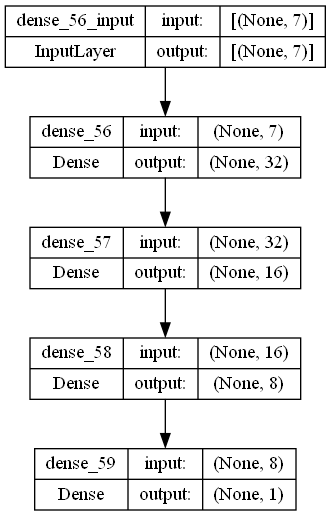

In [92]:
# visualize the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

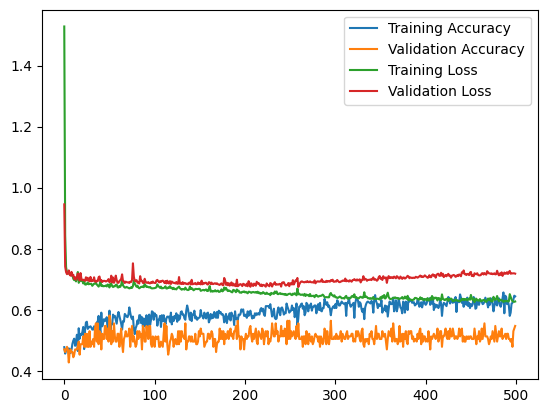

In [93]:
# Plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [107]:
# predict the favorite pokemon
# Test du modèle

data={"Name":"Pikachu","Type 1":"Electric","Type 2":"None","Generation":1,"legendary":False,"color":"Yellow (RYB)","first_letter":"P"}

data2={"Name":"Bulbasaur","Type 1":"Grass","Type 2":"Poison","Generation":1,"legendary":False,"color":"Green","first_letter":"B"}

data3={"Name":"Mewtwo","Type 1":"Psychic","Type 2":"None","Generation":1,"legendary":True,"color":"Purple","first_letter":"M"}

# Créer un dataframe pour le nouveau Pokémon
pokemon = pd.DataFrame([data], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
pokemon2 = pd.DataFrame([data2], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
pokemon3 = pd.DataFrame([data3], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])

# Encoder les données
pokemon["Name"] = le1.fit_transform(pokemon["Name"])
pokemon["Type 1"] = le2.fit_transform(pokemon["Type 1"])
pokemon["Type 2"] = le3.fit_transform(pokemon["Type 2"])
pokemon["Generation"] = le4.fit_transform(pokemon["Generation"])
pokemon["legendary"] = le5.fit_transform(pokemon["legendary"])
pokemon["color"] = le6.fit_transform(pokemon["color"])
pokemon["first_letter"] = le7.fit_transform(pokemon["first_letter"])

pokemon2["Name"] = le1.fit_transform(pokemon2["Name"])
pokemon2["Type 1"] = le2.fit_transform(pokemon2["Type 1"])
pokemon2["Type 2"] = le3.fit_transform(pokemon2["Type 2"])
pokemon2["Generation"] = le4.fit_transform(pokemon2["Generation"])
pokemon2["legendary"] = le5.fit_transform(pokemon2["legendary"])
pokemon2["color"] = le6.fit_transform(pokemon2["color"])
pokemon2["first_letter"] = le7.fit_transform(pokemon2["first_letter"])

pokemon3["Name"] = le1.fit_transform(pokemon3["Name"])
pokemon3["Type 1"] = le2.fit_transform(pokemon3["Type 1"])
pokemon3["Type 2"] = le3.fit_transform(pokemon3["Type 2"])
pokemon3["Generation"] = le4.fit_transform(pokemon3["Generation"])
pokemon3["legendary"] = le5.fit_transform(pokemon3["legendary"])
pokemon3["color"] = le6.fit_transform(pokemon3["color"])
pokemon3["first_letter"] = le7.fit_transform(pokemon3["first_letter"])


# Prédire si le Pokémon est un favori
prediction = model.predict(pokemon)
prediction2 = model.predict(pokemon2)
prediction3 = model.predict(pokemon3)

print("Pikachu is a favorite pokemon: ", prediction[0][0])
print("Bulbasaur is a favorite pokemon: ", prediction2[0][0])
print("Mewtwo is a favorite pokemon: ", prediction3[0][0])


1/1 [==============================] - 0s 17ms/step
Pikachu is a favorite pokemon:  0.98989123
Bulbasaur is a favorite pokemon:  0.98989123
Mewtwo is a favorite pokemon:  0.98989123
